<a href="https://colab.research.google.com/github/gkbrasselle/DS4002Project1/blob/main/Script_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA IMPORT & WRANGLING**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **OPTION 1:** Download the dataset from Kaggle and uploading into Colab

*  Go to the [Kaggle site]([url](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews)) for the dataset and click the "Download" button in the upper right-hand corner.
*Download the files. It will compress all the associated files into a zip folder.
- Locate the downloaded files and unzip the folder to locate the Reviews.csv file
- In the Colab window, go to the file tab and click the option "Upload to session storage"
- When prompted, select the "Reviews.csv" file and upload it.
- After it loads, click the three dots next to the file name and select "copy path"
- paste the file path into the read_csv command below and run the code





In [6]:
# Load Data & store it in a dataframe Ensure that the file path matches your directory
df = pd.read_csv("/content/Reviews.csv")

### **OPTION 2**: Accessing the dataset directly from Kaggle without downloading the file
The following code cell imports the dataset from Kaggle, since it is too large to be stored in GitHub

The link in the code expires 5-7 days after it is generated, so if an error is thrown an new link must be generated.

 To generate new code:
  - Navigate to the [Kaggle site]([url](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews)) containing the raw dataset
  - Click the three dots in the upper right corner to create and save a new notebook
  - Go to the home page of the new notebook, click the three dots in the upper right corner and select "Open in Colab"
  - This will open a new window in Google Colab with the necessary code already generated.
  - You can then copy that code cell into this notebook to replace the expired credentials
  - Run this code cell and locate the file in the Colab file system.
  - Copy the file path and paste it in the read_csv command below
  - run the command to load the data

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'amazon-fine-food-reviews:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F18%2F2157%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240927%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240927T151304Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D63636885430f919cd3ef43a849b7822b4a3d15cd7dbf4c4ec58540673111c1c531778092d9a6c077382338d95e25fea90d8ed668f68f50d5e6b033951bea30053f639eb910e999d34c5549849d72b384531b1af660cadd464026ada3c357bd9ad51f5892260b571ac18cec551d4a0c5232f2ce468f562548e6012ba68eda5f3c593fc2a63ad2c89c8bf4a994cdd06caf53376f0a8f731f0cbcf9236c3c6195137f3662d01fb9511d0dcb8426a1371879fad85240b3f8ec41c45da052a64e2734db457539275e0d894983284fee076d4a3a6daa337cab6ffe0c6e55ff208d69fc5bf35d552c036b85f1ba9d13bdbe02cd113b1515aa26ceddc60cfb10acf4ef11'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 253873708 bytes downloaded
Downloaded and uncompressed: amazon-fine-food-reviews
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/database.sqlite
/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv


In [ ]:
# Load Data & store it in a dataframe
df = pd.read_csv("INSERT FILE PATH HERE")


# Data Cleaning



In [7]:
# Remove any rows that do not indicate helpfulness at all
df = df[df['HelpfulnessDenominator']!= 0]

# Identify unnecessary columns and remove them from the data frame
drop_list = ["Id", "UserId", "ProfileName", "HelpfulnessDenominator", "Time", "Summary"]
df = df.drop(drop_list, axis=1)

# Remove duplicated rows
df = df.drop_duplicates(subset = ["Text"])
df.head()

,ProductId,HelpfulnessNumerator,Score,Text
0,B001E4KFG0,1,5,I have bought several of the Vitality canned d...
2,B000LQOCH0,1,4,This is a confection that has been around a fe...
3,B000UA0QIQ,3,2,If you are looking for the secret ingredient i...
8,B000E7L2R4,1,5,Right now I'm mostly just sprouting this so my...
10,B0001PB9FE,1,5,I don't know if it's the cactus or the tequila...


In [8]:
print(df.shape, '\n')
print(df.dtypes, '\n')

# even when we filter out the reviews that had no indicator of helpfulness, we still have 209,083 rows to work with

(209488, 4) 

ProductId               object
HelpfulnessNumerator     int64
Score                    int64
Text                    object
dtype: object 



In [9]:
# Create a new column that will contain the word count of the review
df["WordCount"] = df["Text"].str.split().str.len()
df.head()

,ProductId,HelpfulnessNumerator,Score,Text,WordCount
0,B001E4KFG0,1,5,I have bought several of the Vitality canned d...,48
2,B000LQOCH0,1,4,This is a confection that has been around a fe...,94
3,B000UA0QIQ,3,2,If you are looking for the secret ingredient i...,41
8,B000E7L2R4,1,5,Right now I'm mostly just sprouting this so my...,26
10,B0001PB9FE,1,5,I don't know if it's the cactus or the tequila...,146


In [10]:
# some of the reviews had hyperlinks or breaks that added weird characters when they were converted to text
# we removed these characters and just replaced them with a space so that it wouldn't affect the reading score
df['Text'] = df['Text'].str.replace('<br />|<br /><br />', ' ', regex=True)
df['Text'] = df['Text'].str.replace(r'<a href="[^"]*">.*?</a>', ' ', regex=True)
df['Text'] = df['Text'].str.replace(r'<span.*?>.*?</span>', ' ', regex=True)

# make sure there aren't any reviews with no text
df = df[df['Text'].str.strip() != '']
df = df[df['Text'] != 'None']
df = df[df['WordCount'] > 10]

# make sure that all remaining reviews have at least one letter to analyze
df = df[df['Text'].str.contains('[a-zA-Z]', regex=True)]

## **Exploratory Data Plots**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


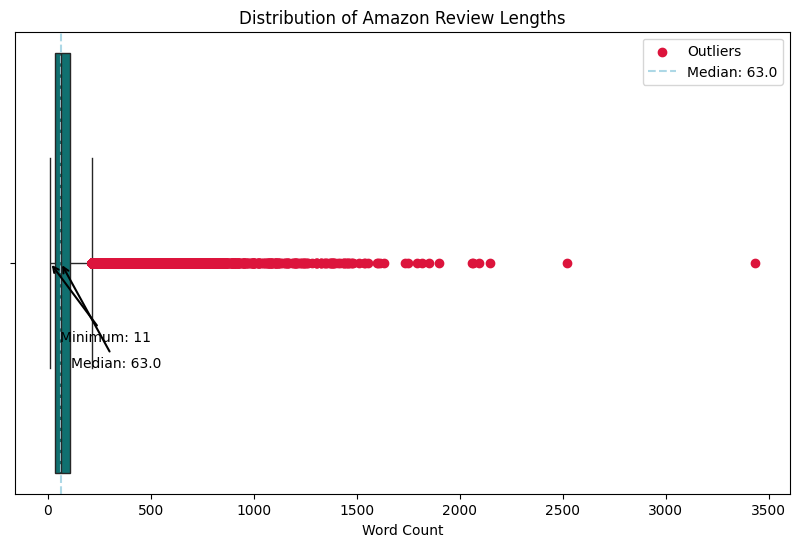

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x=df['WordCount'], color='teal', showfliers=False)

# calculate IQR, lower and upper bounds to detect for outliers in data
Q1 = df['WordCount'].quantile(0.25)
Q3 = df['WordCount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['WordCount'] < lower_bound) | (df['WordCount'] > upper_bound)]

plt.scatter(outliers['WordCount'], [0] * len(outliers), color='crimson', zorder=3, label='Outliers')

# retrieve median and minimum values of WordCount to display on plot
median = df['WordCount'].median()
minimum = df['WordCount'].min()

plt.axvline(median, color='lightblue', linestyle='--', label=f'Median: {median}')
plt.annotate(f'Median: {median}', xy=(median, 0), xytext=(median + 50, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5))

plt.annotate(f'Minimum: {minimum}', xy=(minimum, 0), xytext=(minimum + 50, 0.15),
             arrowprops=dict(facecolor='blue', arrowstyle='->', lw=1.5))

plt.title('Distribution of Amazon Review Lengths')
plt.xlabel('Word Count')
plt.legend()

plt.show()

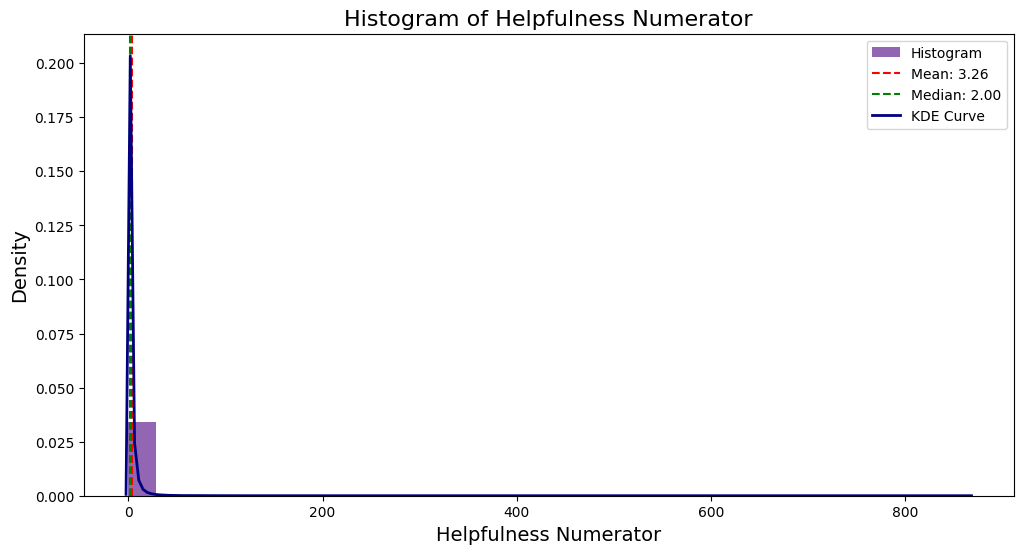

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
plt.hist(df['HelpfulnessNumerator'], bins=30, color='indigo', alpha=0.6, density=True, label='Histogram')

mean_value = df['HelpfulnessNumerator'].mean()
median_value = df['HelpfulnessNumerator'].median()

plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')

sns.kdeplot(df['HelpfulnessNumerator'], color='navy', label='KDE Curve', linewidth=2)

plt.title('Histogram of Helpfulness Numerator', fontsize=16)
plt.xlabel('Helpfulness Numerator', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.grid(False)

plt.show()


<ipython-input-14-f05cfc8295d3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='Score', y='HelpfulnessNumerator', data=avg_helpfulness, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarn

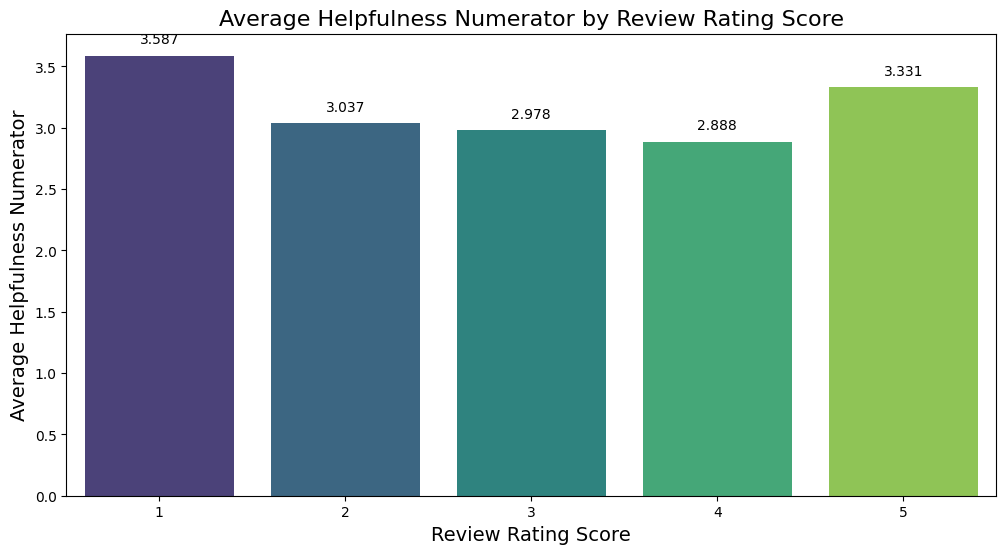

In [14]:
# calculating the average of HelpfulnessNumerator for each review Score
avg_helpfulness = df.groupby('Score')['HelpfulnessNumerator'].mean().reset_index()

plt.figure(figsize=(12, 6))
bar = sns.barplot(x='Score', y='HelpfulnessNumerator', data=avg_helpfulness, palette='viridis')

# adding the average values for each Score
for index, row in avg_helpfulness.iterrows():
    bar.text(row.name, row['HelpfulnessNumerator'] + 0.1, f'{row["HelpfulnessNumerator"]:.3f}',
             color='black', ha="center")

plt.title('Average Helpfulness Numerator by Review Rating Score', fontsize=16)
plt.xlabel('Review Rating Score', fontsize=14)
plt.ylabel('Average Helpfulness Numerator', fontsize=14)

plt.show()


In [ ]:
df.to_csv('Cleaned_Reviews.csv')

# **READABILITY ANALYSIS**

In [15]:
# Load the readability module to generate Reading Ease scores
!pip install https://github.com/andreasvc/readability/tarball/master

     - 35.0 kB 7.8 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for readability: filename=readability-0.3.1-py3-none-any.whl size=36386 sha256=8996b962403674258713d587e22b4232ece8da47fec40e8d3dda6a8f39b05044
  Stored in directory: /tmp/pip-ephem-wheel-cache-tgg81bey/wheels/c7/83/45/a2ec74fc6cb14879400719c8a2d3dd5fa6daaa6699cae8a097
Successfully built readability


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import readability

In [17]:
# this function parses a piece of text and returns the Flesch-Kincaid Reading Ease Score
def readability_calculation(text):
      results = readability.getmeasures(text, lang = "en")
      FRE = results['readability grades']['FleschReadingEase']
      return FRE

In [18]:
# This applies the readability calculation to the "Text" column of the dataframe
# stores the resulting score in a new Column

# This chunk of code takes around 3-4 minutes to run


df["FRE"] = df["Text"].apply(readability_calculation)
df['FRE']=pd.to_numeric(df['FRE'])
df.head()

,ProductId,HelpfulnessNumerator,Score,Text,WordCount,FRE
0,B001E4KFG0,1,5,I have bought several of the Vitality canned d...,48,41.790000
2,B000LQOCH0,1,4,This is a confection that has been around a fe...,94,-2.410217
3,B000UA0QIQ,3,2,If you are looking for the secret ingredient i...,41,55.859024
8,B000E7L2R4,1,5,Right now I'm mostly just sprouting this so my...,26,89.337308
10,B0001PB9FE,1,5,I don't know if it's the cactus or the tequila...,146,-44.207902


# **SINGLE LINEAR REGRESSION - PHASE 1**

---



In [19]:
#store a cleaned copy as df0
df0 = df

In [ ]:
# reset df to the previous cleaned version
df = df0

In [ ]:
df.drop(['HN_log', 'FRE_log'], axis=1, inplace=True)

In [20]:
df.head()

,ProductId,HelpfulnessNumerator,Score,Text,WordCount,FRE
0,B001E4KFG0,1,5,I have bought several of the Vitality canned d...,48,41.790000
2,B000LQOCH0,1,4,This is a confection that has been around a fe...,94,-2.410217
3,B000UA0QIQ,3,2,If you are looking for the secret ingredient i...,41,55.859024
8,B000E7L2R4,1,5,Right now I'm mostly just sprouting this so my...,26,89.337308
10,B0001PB9FE,1,5,I don't know if it's the cactus or the tequila...,146,-44.207902


<Axes: xlabel='FRE', ylabel='HelpfulnessNumerator'>

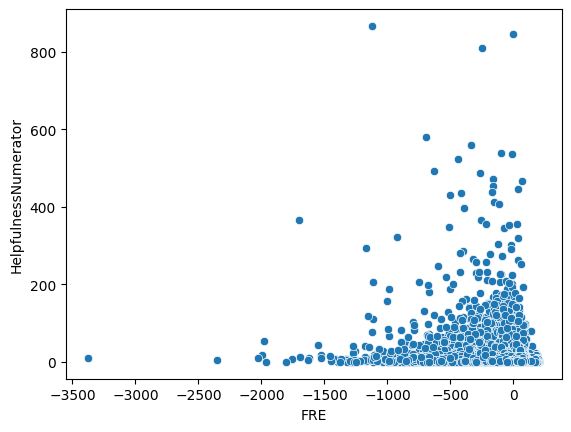

In [21]:
# Visualize the current spread of the data
sns.scatterplot(data=df,y='HelpfulnessNumerator',x='FRE')

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='FRE', ylabel='HelpfulnessNumerator'>

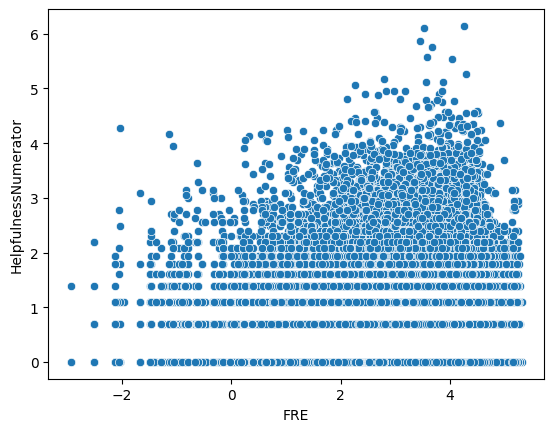

In [22]:
# Apply log transformation
df_log = df[['HelpfulnessNumerator','FRE']].copy()

df_log['HelpfulnessNumerator'] = np.log(df_log['HelpfulnessNumerator'])
df_log['FRE'] = np.log(df_log['FRE'])
sns.scatterplot(data=df_log,y='HelpfulnessNumerator',x='FRE')
# Now we analyze each variable separately to determine what exactly is an outlier

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='HelpfulnessNumerator'>

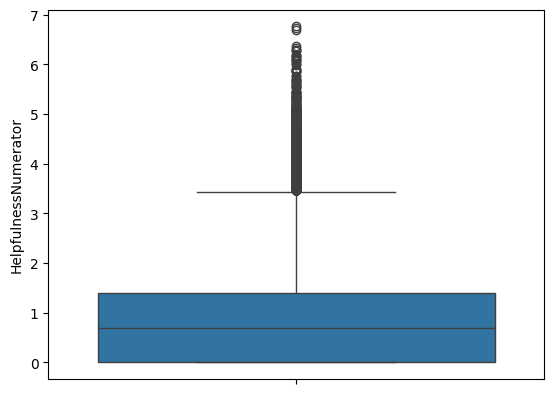

In [23]:
# Remove outliers

sns.boxplot(data=df_log,y='HelpfulnessNumerator')
# Outliers above 3.5

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='FRE'>

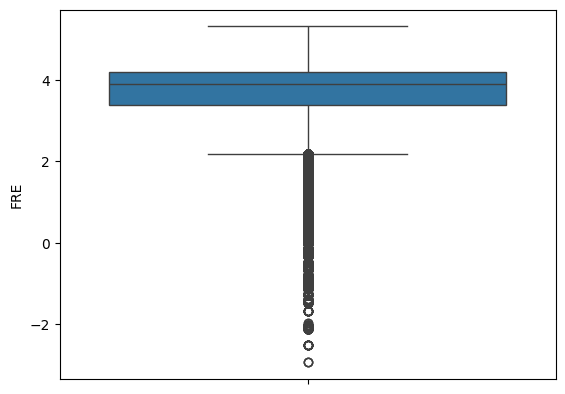

In [24]:
sns.boxplot(data=df_log,y='FRE')
# Outliers below 2

In [25]:
# Drop outliers:
df_log = df_log.loc[df_log['HelpfulnessNumerator']<3.5,:]
df_log = df_log.loc[df_log['FRE']>2,:]

<Axes: xlabel='FRE', ylabel='HelpfulnessNumerator'>

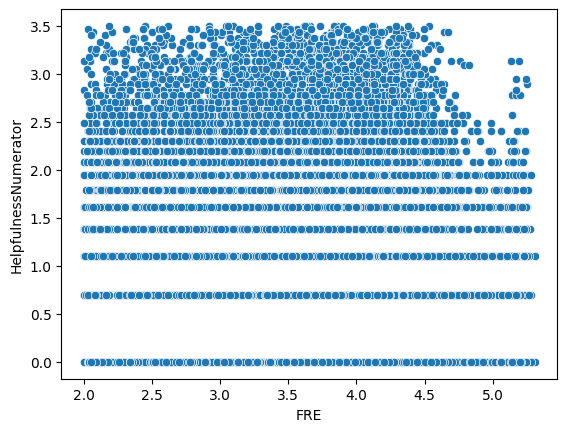

In [26]:
# double check to make sure most outliers are gone
sns.scatterplot(data=df_log,y='HelpfulnessNumerator',x='FRE')

In [27]:
# Single Linear Regression Function
def slr(x,y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    SSE =  np.inner(residuals,residuals)
    rsq = 1 - SSE/(np.inner( y-np.mean(y),y-np.mean(y)))
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals, 'rsq':rsq})

In [30]:
# Make sure there are no NaN values or inf
df_log = df_log.dropna()
df_log = df_log[df_log['HelpfulnessNumerator'] != -np.inf]

In [31]:
print(df_log["FRE"].describe())

count    123096.000000
mean          3.790156
std           0.574661
min           2.001590
25%           3.488413
50%           3.917829
75%           4.199155
max           5.307079
Name: FRE, dtype: float64


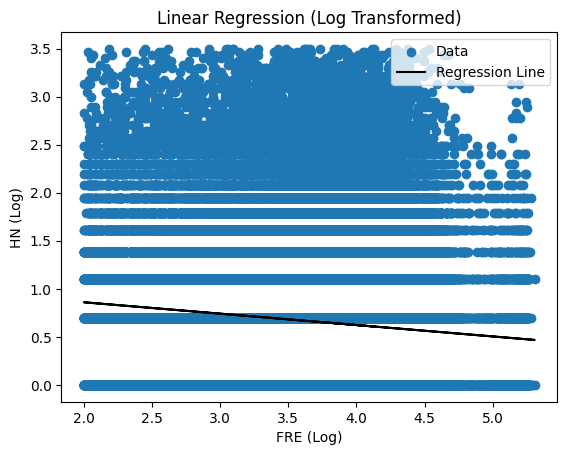

In [33]:
x_log = df_log['FRE']
y_log = df_log['HelpfulnessNumerator']

coef_log = slr(x_log,y_log)

y_hat_log = coef_log['b0']+coef_log['b1']*x_log
plt.scatter(x_log,y_log,label='Data')
plt.plot(x_log,y_hat_log,label='Regression Line',color='black')
plt.xlabel("FRE (Log)")
plt.ylabel("HN (Log)")
plt.legend(loc='upper right')
plt.title('Linear Regression (Log Transformed)')

plt.show()

In [34]:
# Find R_squared to determine if there is a correlation between the two variable
reg_log=slr(x_log,y_log)
print(reg_log['rsq'])

0.008326821394331052


In [35]:
df.head()

,ProductId,HelpfulnessNumerator,Score,Text,WordCount,FRE
0,B001E4KFG0,1,5,I have bought several of the Vitality canned d...,48,41.790000
2,B000LQOCH0,1,4,This is a confection that has been around a fe...,94,-2.410217
3,B000UA0QIQ,3,2,If you are looking for the secret ingredient i...,41,55.859024
8,B000E7L2R4,1,5,Right now I'm mostly just sprouting this so my...,26,89.337308
10,B0001PB9FE,1,5,I don't know if it's the cactus or the tequila...,146,-44.207902


In [ ]:
df.drop(['HN_log', 'FRE_log'], axis=1, inplace=True)

In [60]:
#min max scaling
df_norm = df[['HelpfulnessNumerator','FRE']].copy()

df_norm.head()

,HelpfulnessNumerator,FRE
0,1,41.790000
2,1,-2.410217
3,3,55.859024
8,1,89.337308
10,1,-44.207902


<Axes: xlabel='FRE', ylabel='HelpfulnessNumerator'>

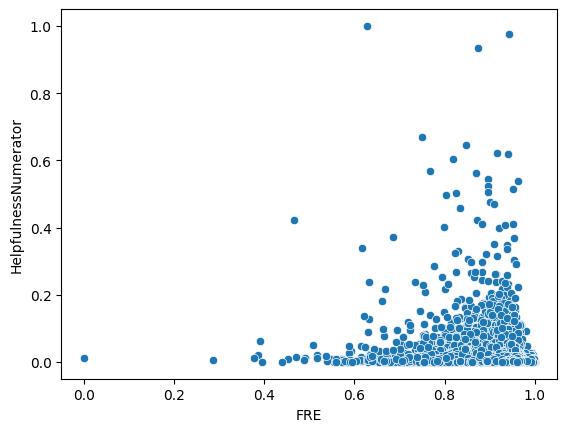

In [61]:
for column in df_norm.columns:
    df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())

# view normalized data
sns.scatterplot(data=df_norm,y='HelpfulnessNumerator',x='FRE')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='HelpfulnessNumerator'>

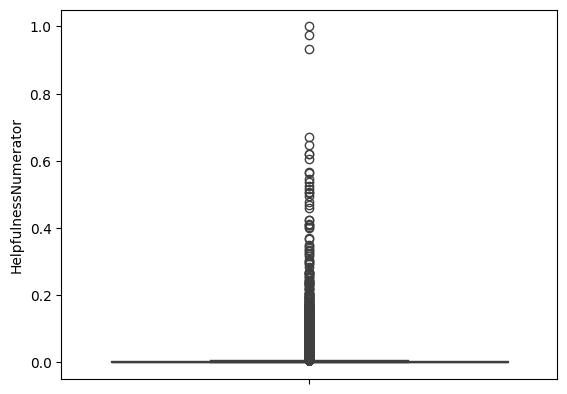

In [38]:
# Visualize outliers

sns.boxplot(data=df_norm,y='HelpfulnessNumerator')
# lots of outliers above 0.05 (approximately)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='FRE'>

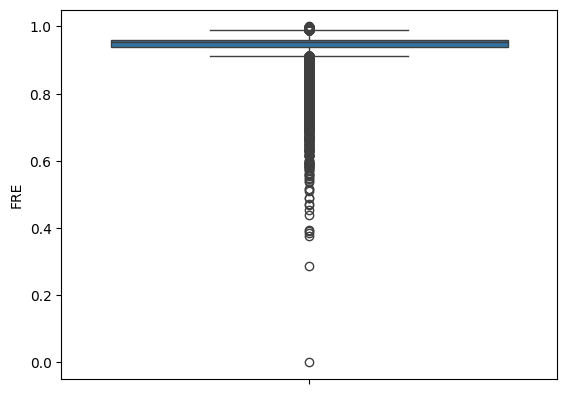

In [39]:
sns.boxplot(data=df_norm,y='FRE')
# Lots of outliers below 0.9

In [62]:
# Drop outliers:
df_norm = df_norm.loc[df_norm['HelpfulnessNumerator']<0.05,:]
df_norm = df_norm.loc[df_norm['FRE']>0.9,:]

<Axes: xlabel='FRE', ylabel='HelpfulnessNumerator'>

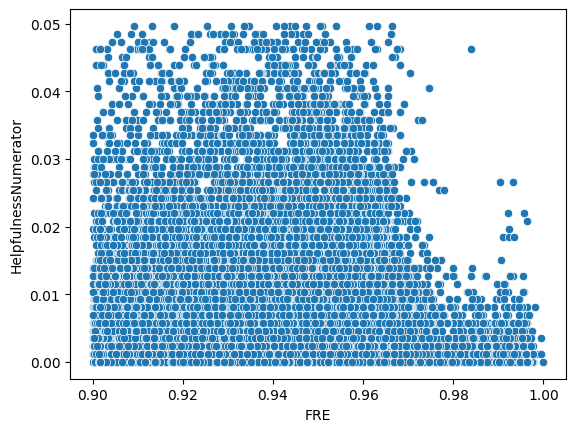

In [63]:
# double check to make sure most outliers are gone
sns.scatterplot(data=df_norm,y='HelpfulnessNumerator',x='FRE')

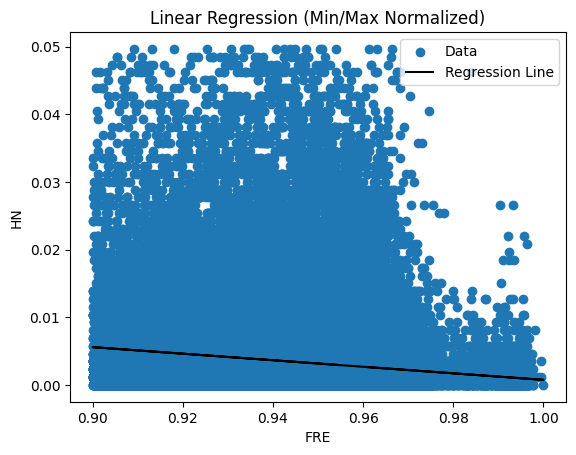

In [64]:
x_norm = df_norm['FRE']
y_norm = df_norm['HelpfulnessNumerator']

coef_norm = slr(x_norm,y_norm)

y_hat_norm = coef_norm['b0']+coef_norm['b1']*x_norm
plt.scatter(x_norm,y_norm,label='Data')
plt.plot(x_norm,y_hat_norm,label='Regression Line',color='black')
plt.xlabel("FRE")
plt.ylabel("HN")
plt.legend(loc='upper right')
plt.title('Linear Regression (Min/Max Normalized)')

plt.show()

In [65]:
reg=slr(x_norm,y_norm)
print(reg['rsq'])

0.025513692407742705


# **MULTIPLE LINEAR REGRESSION - PHASE 2**

In [97]:
df_log = df[['HelpfulnessNumerator','FRE','WordCount']].copy()
df_log.head()

,HelpfulnessNumerator,FRE,WordCount
0,1,41.790000,48
2,1,-2.410217,94
3,3,55.859024,41
8,1,89.337308,26
10,1,-44.207902,146


In [98]:
# Apply log transformation

df_log['HelpfulnessNumerator'] = np.log(df_log['HelpfulnessNumerator'])
df_log['FRE'] = np.log(df_log['FRE'])
df_log['WordCount'] = np.log(df_log['WordCount'])

# Now we analyze each variable separately to determine what exactly is an outlier

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='WordCount'>

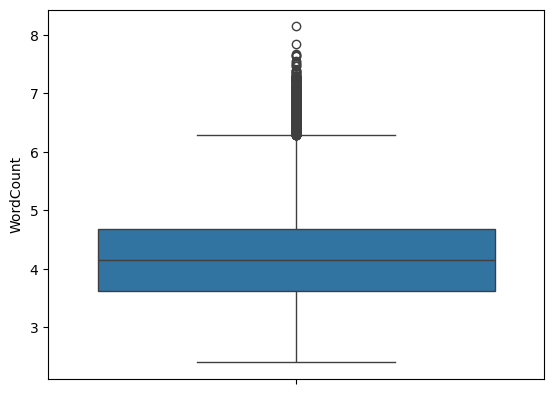

In [99]:
# Visualize outliers for WordCount (the other variables have the same outliers as before)

sns.boxplot(data=df_log,y='WordCount')
#outliers above 6.5 (approximately)

In [85]:
# Remove outliers
df_log = df_log.loc[df_log['HelpfulnessNumerator']<3.5,:]
df_log = df_log.loc[df_log['FRE']>2,:]
df_log = df_log.loc[df_log['WordCount']<6.5,:]

In [86]:
# Multiple linear regression, matrix algebra approach
def mlr(X,y):
    XpX = X.T@X # Compute X'X
    Xpy = X.T@y # Compute X'y
    b = np.linalg.solve(XpX, Xpy) # Solve normal equations
    y_hat = X@b # Compute predictions
    residuals = y-y_hat # Compute residuals
    SSE =  np.inner(residuals,residuals) # Compute SSE
    rsq = 1 - SSE/np.inner( y-np.mean(y),y-np.mean(y)) # Compute Rsq
    return({'b':b,'y_hat':y_hat,'residuals':residuals,'rsq':rsq,'SSE':SSE})


In [87]:
# Variables of Interest: Review Length (WordCount) & Reading Ease Score (FRE)
df_log['FRE_sq'] = df_log['FRE']**2
df_log['WC_sq'] = df_log['WordCount']**2
df_log['(Intercept)'] = 1
vars = ['(Intercept)','FRE','FRE_sq','WordCount','WC_sq']
x = df_log.loc[:,vars]
y = df_log['HelpfulnessNumerator']

In [88]:
# Make sure there aren't any instances of NaN or inf
df_log = df_log.dropna()
df_log = df_log[df_log['HelpfulnessNumerator'] != -np.inf]
df_log = df_log[df_log['WordCount'] != -np.inf]

In [101]:
reg_log = mlr(x,y) # Run multiple linear regression
print(reg_log['b']) # Print coefficients
print(reg_log['rsq']) # R-squared measure of model fit

[ 0.87582646 -0.00440185 -0.01014699 -0.10242818  0.0224786 ]
0.009002672571521209


<Axes: ylabel='Density'>

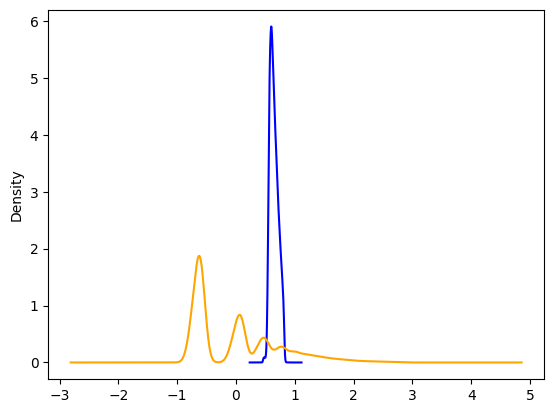

In [102]:
reg_log['y_hat'].plot.kde(color = "Blue")
reg_log['residuals'].plot.kde(color = "Orange")

In [103]:
mlr_logstats = pd.DataFrame({'b': [reg_log['b']],'sse': [reg_log['SSE']],'rsq': [reg_log['rsq']]})
mlr_logstats.head()

,b,sse,rsq
0,"[0.8758264568136876, -0.004401846284103933, -0...",68054.973117,0.009003


In [106]:
# MIN/MAX SCALING
df_norm = df[['HelpfulnessNumerator','FRE', 'WordCount']].copy()

df_norm.head()

,HelpfulnessNumerator,FRE,WordCount
0,1,41.790000,48
2,1,-2.410217,94
3,3,55.859024,41
8,1,89.337308,26
10,1,-44.207902,146


In [107]:
# normalize
for column in df_norm.columns:
    df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='WordCount'>

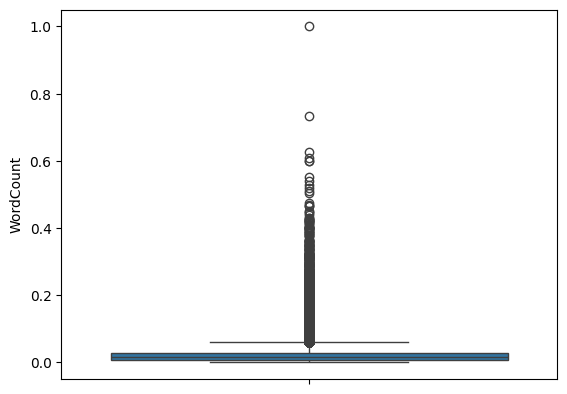

In [108]:
# Visualize outliers for WordCount (the other variables have the same outliers as before)

sns.boxplot(data=df_norm,y='WordCount')
#outliers above 0.1 (approximately)

In [109]:
# Remove Outliers
df_norm = df_norm.loc[df_norm['HelpfulnessNumerator']<0.05,:]
df_norm = df_norm.loc[df_norm['FRE']>0.9,:]
df_norm = df_norm.loc[df_norm['WordCount']<0.1,:]

In [110]:
# Variables of Interest: Review Length (WordCount) & Reading Ease Score (FRE)
df_norm['FRE_sq'] = df_norm['FRE']**2
df_norm['WC_sq'] = df_norm['WordCount']**2
df_norm['(Intercept)'] = 1
vars = ['(Intercept)','FRE','FRE_sq','WordCount','WC_sq']
x = df_norm.loc[:,vars]
y = df_norm['HelpfulnessNumerator']

In [111]:
reg_norm = mlr(x,y) # Run multiple linear regression
print(reg_norm['b']) # Print coefficients
print(reg_norm['rsq']) # R-squared measure of model fit

[ 1.10862672 -2.26328467  1.15718302  0.04685491 -1.46171047]
0.02738514320068397


<Axes: ylabel='Density'>

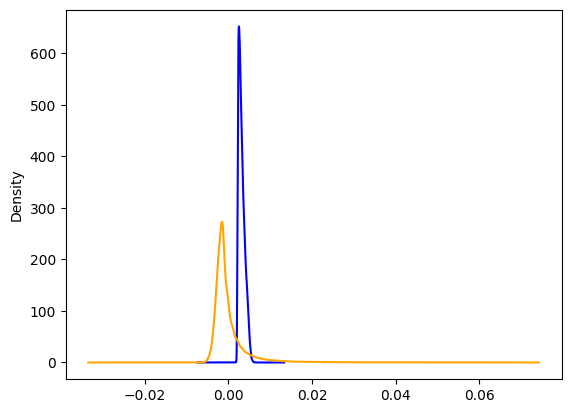

In [112]:
reg_norm['y_hat'].plot.kde(color = "Blue")
reg_norm['residuals'].plot.kde(color = "Orange")

In [113]:
mlr_normstats = pd.DataFrame({'b': [reg_norm['b']],'sse': [reg_norm['SSE']],'rsq': [reg_norm['rsq']]})
mlr_normstats.head()

,b,sse,rsq
0,"[1.1086267216365409, -2.2632846655904526, 1.15...",3.89286,0.027385
